# xarray e netCDF

In [44]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np

### Leitura do arquivo netCDF (.nc)

In [91]:
ds = xr.open_dataset(r'.\1 - Organized data gauge\BRAZIL\NetCDF\IDW_consolidation_decade\precipitation_idw_2011_2020.nc')
ds

<xarray.Dataset> Size: 6GB
Dimensions:   (lat: 645, long: 591, datetime: 3653)
Coordinates:
  * lat       (lat) float32 3kB -33.75 -33.65 -33.55 -33.55 ... 5.15 5.25 5.35
  * long      (long) float32 2kB -74.05 -73.95 -73.95 ... -34.95 -34.85 -34.75
  * datetime  (datetime) datetime64[ns] 29kB 2011-01-01 ... 2020-12-31
Data variables:
    rain_mm   (lat, long, datetime) float32 6GB ...

In [92]:
pr = ds['rain_mm']
pr

<xarray.DataArray 'rain_mm' (lat: 645, long: 591, datetime: 3653)> Size: 6GB
[1392505335 values with dtype=float32]
Coordinates:
  * lat       (lat) float32 3kB -33.75 -33.65 -33.55 -33.55 ... 5.15 5.25 5.35
  * long      (long) float32 2kB -74.05 -73.95 -73.95 ... -34.95 -34.85 -34.75
  * datetime  (datetime) datetime64[ns] 29kB 2011-01-01 ... 2020-12-31
Attributes:
    units:    mm

### Criando um subset

In [93]:
ds_subset = ds.sel(long = slice(-57, -53), lat = slice(-9, -6))
ds_subset

<xarray.Dataset> Size: 41MB
Dimensions:   (lat: 50, long: 56, datetime: 3653)
Coordinates:
  * lat       (lat) float32 200B -8.95 -8.95 -8.85 -8.75 ... -6.15 -6.05 -6.05
  * long      (long) float32 224B -56.95 -56.95 -56.85 ... -53.15 -53.05 -53.05
  * datetime  (datetime) datetime64[ns] 29kB 2011-01-01 ... 2020-12-31
Data variables:
    rain_mm   (lat, long, datetime) float32 41MB ...

In [ ]:
# ds_subset.to_netcdf(r'.\1 - Organized data gauge\Demo\joao_pessoa.nc')

### Extraindo variáveis

In [94]:
pr = ds_subset['rain_mm']

(array([9.593867e+06, 5.549820e+05, 6.605600e+04, 1.116900e+04,
        1.510000e+03, 4.610000e+02, 1.740000e+02, 9.200000e+01,
        5.100000e+01, 3.800000e+01]),
 array([  0.        ,  22.6945343 ,  45.3890686 ,  68.08360291,
         90.77813721, 113.47267151, 136.16720581, 158.86174011,
        181.55627441, 204.25080872, 226.94534302]),
 <BarContainer object of 10 artists>)

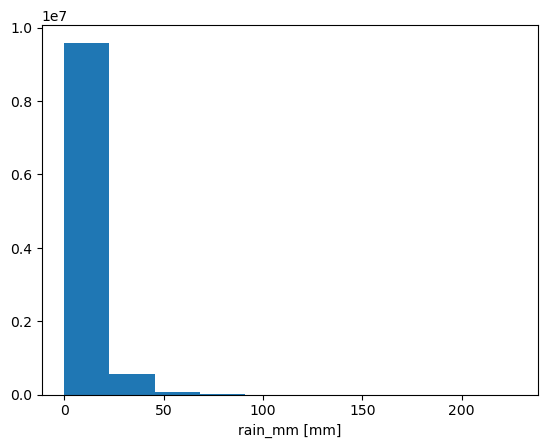

In [95]:
pr.plot()

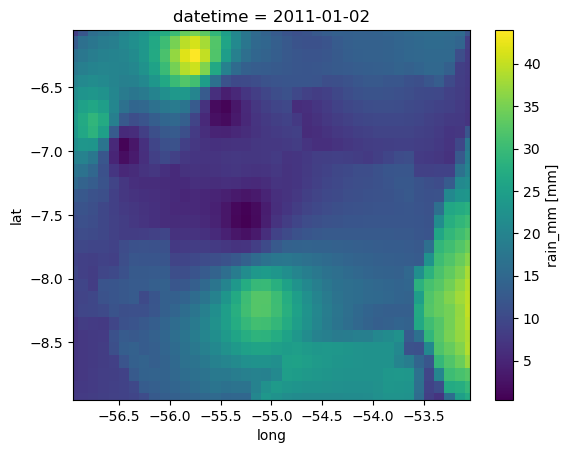

In [96]:
pr.isel(datetime = 1).plot()

### Indexando e selecionando dados

In [97]:
#index selection
pr.isel(datetime =  slice(0, 1))

<xarray.DataArray 'rain_mm' (lat: 50, long: 56, datetime: 1)> Size: 11kB
[2800 values with dtype=float32]
Coordinates:
  * lat       (lat) float32 200B -8.95 -8.95 -8.85 -8.75 ... -6.15 -6.05 -6.05
  * long      (long) float32 224B -56.95 -56.95 -56.85 ... -53.15 -53.05 -53.05
  * datetime  (datetime) datetime64[ns] 8B 2011-01-01
Attributes:
    units:    mm

In [98]:
#value selection
pr.sel(datetime =  slice('2024-12-25T00:00:00.000000000','2024-12-27T00:00:00.000000000'))

<xarray.DataArray 'rain_mm' (lat: 50, long: 56, datetime: 0)> Size: 0B
[0 values with dtype=float32]
Coordinates:
  * lat       (lat) float32 200B -8.95 -8.95 -8.85 -8.75 ... -6.15 -6.05 -6.05
  * long      (long) float32 224B -56.95 -56.95 -56.85 ... -53.15 -53.05 -53.05
  * datetime  (datetime) datetime64[ns] 0B 
Attributes:
    units:    mm

### Extraindo dados de um ponto

In [109]:
# Convert to DataFrame
df_pr = pr.to_dataframe().reset_index().dropna()
df_pr['long'] = df_pr['long'].astype(float).round(2)
df_pr['lat'] = df_pr['lat'].astype(float).round(2)

df_pr.sort_values(['rain_mm']).tail(60)

,lat,long,datetime,rain_mm
9268821,-6.25,-55.75,2014-03-06,196.608109
8172530,-6.55,-53.15,2013-02-08,196.738754
8377098,-6.55,-53.15,2013-02-08,196.738754
5922282,-7.15,-53.15,2013-02-08,197.676422
6126850,-7.15,-53.15,2013-02-08,197.676422
7763394,-6.65,-53.15,2013-02-08,198.384430
7967962,-6.65,-53.15,2013-02-08,198.384430
9064189,-6.35,-55.75,2014-01-01,200.207260
8859621,-6.35,-55.75,2014-01-01,200.207260
9677893,-6.15,-55.75,2014-01-01,200.865326


In [102]:
df_pr_teste = df_pr[ (df_pr['lat'] == -7.95) & (df_pr['long'] == -54.55)]
df_pr_teste['year'] = df_pr_teste['datetime'].dt.year
df_pr_teste

C:\Users\linde\AppData\Local\Temp\ipykernel_9460\3433997286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr_teste['year'] = df_pr_teste['datetime'].dt.year


,lat,long,datetime,rain_mm,year
2779933,-7.95,-54.55,2011-01-01,10.973380,2011
2779934,-7.95,-54.55,2011-01-02,17.761915,2011
2779935,-7.95,-54.55,2011-01-03,0.406750,2011
2779936,-7.95,-54.55,2011-01-04,7.850499,2011
2779937,-7.95,-54.55,2011-01-05,5.270981,2011
...,...,...,...,...,...
3196370,-7.95,-54.55,2020-12-27,9.721675,2020
3196371,-7.95,-54.55,2020-12-28,14.668605,2020
3196372,-7.95,-54.55,2020-12-29,6.198455,2020
3196373,-7.95,-54.55,2020-12-30,3.375309,2020


In [103]:
# Group by lat, long, year and sum rain_mm
df_grouped = df_pr_teste.groupby(['lat', 'long', 'year'])['rain_mm'].sum().reset_index()

# Display the result
print(df_grouped)

    lat   long  year       rain_mm
0 -7.95 -54.55  2011  12418.062500
1 -7.95 -54.55  2012  12610.754883
2 -7.95 -54.55  2013  11255.404297
3 -7.95 -54.55  2014  13172.890625
4 -7.95 -54.55  2015  12250.592773
5 -7.95 -54.55  2016  16806.615234
6 -7.95 -54.55  2017  17436.707031
7 -7.95 -54.55  2018  20133.281250
8 -7.95 -54.55  2019  19687.333984
9 -7.95 -54.55  2020  17033.353516


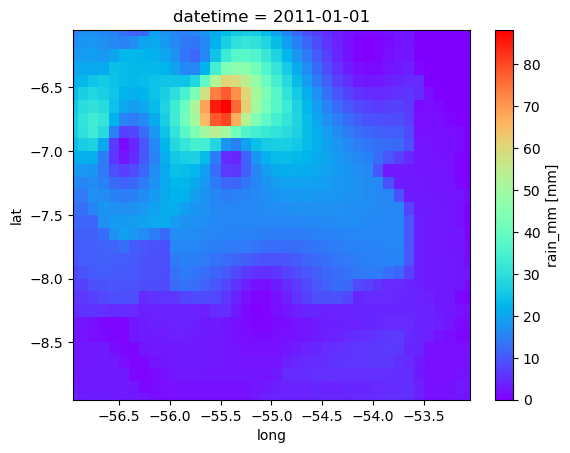

In [104]:
pr.isel(datetime =  0).plot(cmap = 'rainbow')

<xarray.Dataset> Size: 6GB
Dimensions:   (lat: 645, long: 591, datetime: 3653)
Coordinates:
  * lat       (lat) float32 3kB -33.75 -33.65 -33.55 -33.55 ... 5.15 5.25 5.35
  * long      (long) float32 2kB -74.05 -73.95 -73.95 ... -34.95 -34.85 -34.75
  * datetime  (datetime) datetime64[ns] 29kB 2011-01-01 ... 2020-12-31
Data variables:
    rain_mm   (lat, long, datetime) float32 6GB ...

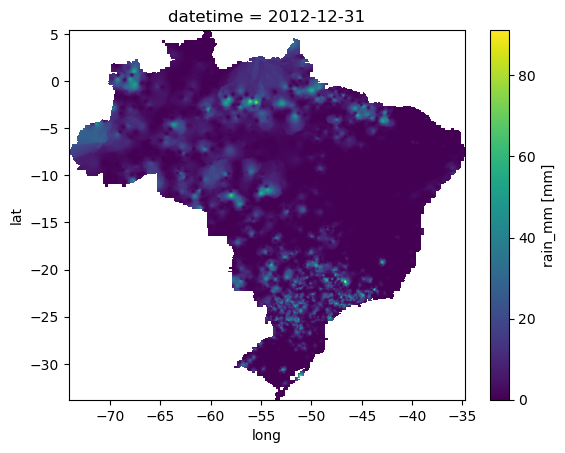

In [115]:
# ds['rain_mm'].isel(datetime =  0).plot(cmap = 'rainbow')
ds['rain_mm'].isel(datetime =  365*2).plot(cmap = 'viridis')
ds
